In [4]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


##Components of only panel <br>
Data requirements: PBR matrix, mutation matrix

In [2]:
kind = 'all'

In [3]:
patient_affinities = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.{0}.csv'.format(kind), index_col=0)
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.{0}.csv'.format(kind), index_col=0)

In [5]:
# group mutations by frequency
counts = list(patient_mutations.sum().unique())
mutations_by_count = {}
for count in counts:
    # group all of the mutations with this count in TCGA
    mutations_by_count[count] = list(patient_mutations.sum()[patient_mutations.sum() == count].index)
    # Add column for each patient with the median of their affinities for that mutation count
    patient_affinities[count] = patient_affinities[mutations_by_count[count]].median(axis=1)
counts.sort()

In [6]:
grouped = patient_affinities.ix[:, counts].median().reset_index()
grouped.columns = ['index', 'scores']
p, rho = sp.spearmanr(grouped.index, grouped.scores)[1], sp.spearmanr(grouped.index, grouped.scores)[0]
print p, rho

0.0919205302737 0.245990175682


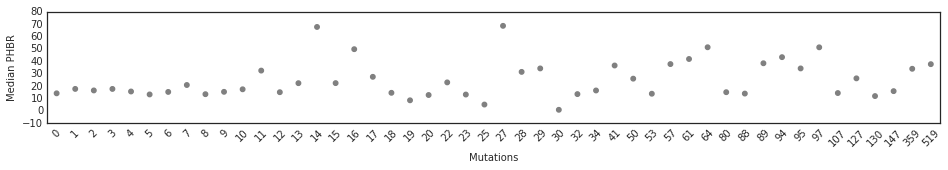

In [7]:
plt.figure(figsize=(16, 2))
ax = sns.pointplot(x='index', y='scores', data=grouped, order=counts, color="grey", join=False)
plt.xticks(rotation=45)
#plt.ylim(0,3.5)
plt.xlabel('Mutations')
plt.ylabel('Median PHBR')
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.scatter.pdf')

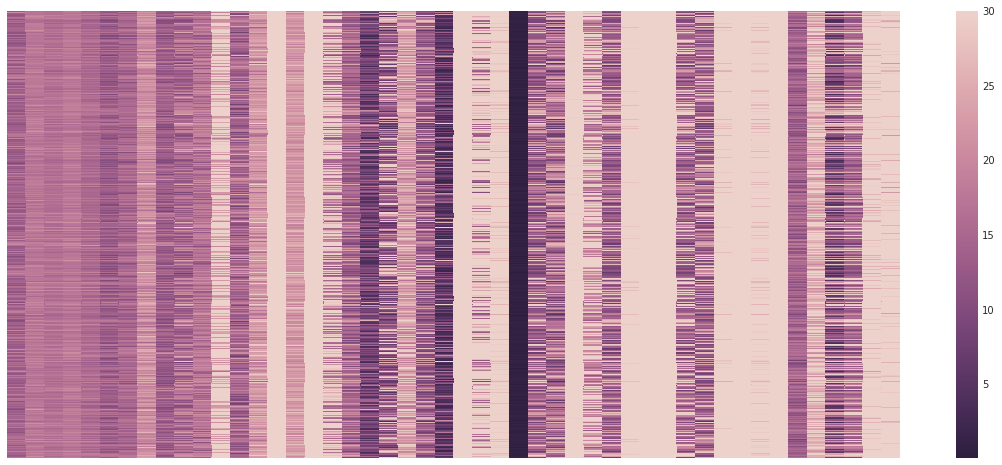

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(patient_affinities.ix[:, counts], xticklabels=False, yticklabels=False, vmax=30, cmap=sns.cubehelix_palette(reverse=True, as_cmap=True))
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.heatmap.pdf')

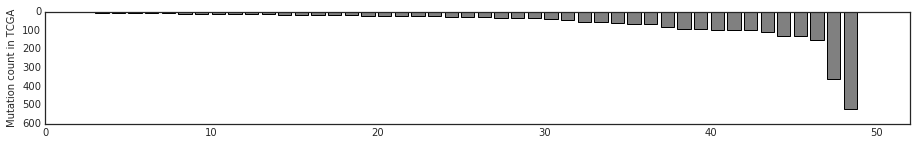

In [9]:
plt.figure(figsize=(15.5,2))
plt.gca().invert_yaxis()
plt.bar(range(1, len(counts)+1), counts, color='grey')
plt.xlim(0, 52)
plt.ylabel('Mutation count in TCGA')
#plt.savefig(PATH_TO_GENERATED_FIGURES + 'pop_frequency.bar.pdf')

In [13]:
grouped

,index,scores
0,0,14.100026
1,1,17.664304
2,2,16.427038
3,3,17.643480
4,4,15.576244
5,5,13.198182
6,6,15.227749
7,7,20.810379
8,8,13.403466
9,9,15.310142
